In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

%load_ext google.cloud.bigquery

What is the avg age of males and females in different countries around the world.


As there is no direct way to calculate average age, the below approach is taken: We have indicator codes like 'SP.POP.%.MA.5Y' which give us % population between each 5Y band from age 0 to age 80+ example codes are SP.POP.10-14.MA.5Y SP.POP.45-49.MA.5Y 

Below query extracts the starting age of each 5Y block and adds 2.5 to it to get the average age We already have the % population in that age band as value field. This is added up for each country to get the average age in each country

In [23]:
%%bigquery df_avg_age
SELECT round(sum(((cast(substr(indicator_code,8,2) as INT64) + 2.5) * value))/100,2) as Avg_AGE ,  country_code, country_name
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
where indicator_code like 'SP.POP.%.MA.5Y' and year = 2019
group by country_code, country_name
order by Avg_AGE DESC

Top 20 countries with highest Average Ages


In [54]:
%%bigquery df_avg_age
SELECT round(sum(((cast(substr(indicator_code,8,2) as INT64) + 2.5) * value))/100,2) as Avg_AGE ,  country_code, country_name
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
where indicator_code like 'SP.POP.%.MA.5Y' and year = 2019
group by country_code, country_name
order by Avg_AGE DESC limit 20

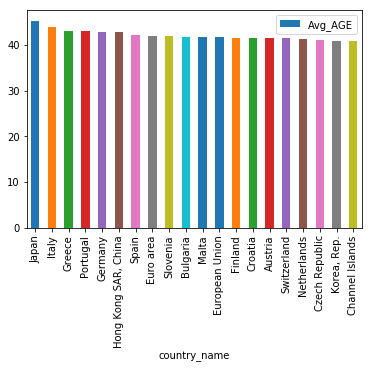

In [27]:
df_avg_age.plot(kind="bar", x="country_name", y="Avg_AGE")

In [25]:
df_avg_age.describe()

,Avg_AGE
count,20.000000
mean,42.175500
std,1.107099
min,40.890000
25%,41.535000
50%,41.795000
75%,42.950000
max,45.350000


20 countries with lowest Average Ages

In [29]:
%%bigquery df_avg_age
SELECT round(sum(((cast(substr(indicator_code,8,2) as INT64) + 2.5) * value))/100,2) as Avg_AGE ,  country_code, country_name
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
where indicator_code like 'SP.POP.%.MA.5Y' and year = 2019
group by country_code, country_name
order by Avg_AGE ASC limit 20

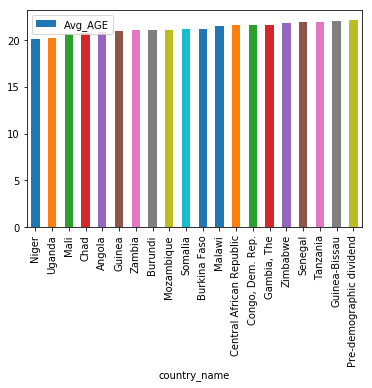

In [30]:
df_avg_age.plot(kind="bar", x="country_name", y="Avg_AGE")

In [2]:
%%bigquery survival_male
select  value as survival_male_65, country_name, year 
from dataproc-300110.worldbankhealth.health_nutrition_population 
where indicator_code in ('SP.DYN.TO65.MA.ZS') and year > 2000

In [3]:
%%bigquery health_exp
select value as health_exp, country_name, year 
from dataproc-300110.worldbankhealth.health_nutrition_population 
where indicator_code in ('SH.XPD.CHEX.PC.CD') and year > 2000

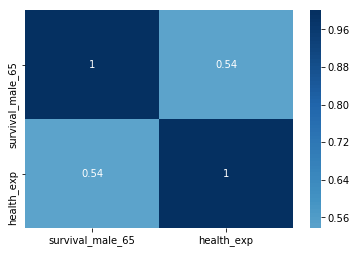

In [4]:
merge_pd = pd.merge(survival_male, health_exp, on=['country_name','year'])

corr_df = merge_pd

corr_df.drop(['year', 'country_name'], inplace=True, axis='columns')
corrMatrix = corr_df.corr()

sn.heatmap(corrMatrix,cmap='RdBu', center=0, annot=True)
plt.savefig('heathexp_survival_male_correlation.png')
plt.show()

In [6]:
%%bigquery survival_female
select  value as survival_female_65, country_name, year
from dataproc-300110.worldbankhealth.health_nutrition_population
where indicator_code in ('SP.DYN.TO65.FE.ZS') and year > 2000

In [7]:
merge_pd = pd.merge(survival_female, health_exp, on=['country_name','year'])
corr_df = merge_pd

corr_df.drop(['year', 'country_name'], inplace=True, axis='columns')
corrMatrix = corr_df.corr()

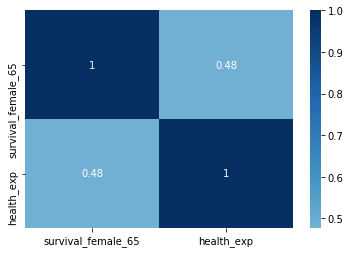

In [8]:
sn.heatmap(corrMatrix,cmap='RdBu', center=0, annot=True)
plt.savefig('heathexp_survival_female_correlation.png')
plt.show()

In [9]:
%%bigquery health_exp_pp
select value as health_exp_pp, country_name, year 
from dataproc-300110.worldbankhealth.health_nutrition_population 
where indicator_code in ('SH.XPD.CHEX.PC.CD') and year > 2000

In [10]:
merge_pd = pd.merge(survival_female, health_exp_pp, on=['country_name','year'])
corr_df = merge_pd

corr_df.drop(['year', 'country_name'], inplace=True, axis='columns')
corrMatrix = corr_df.corr()


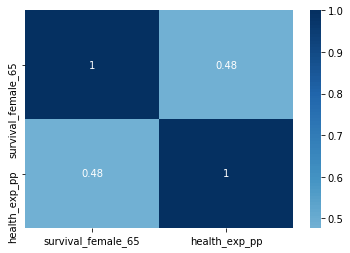

In [11]:
sn.heatmap(corrMatrix,cmap='RdBu', center=0, annot=True)
plt.savefig('heathexp_pp_survival_female_male_correlation.png')
plt.show()

- Correlation between School enrollment and unemployment for males and females

School enrollment, secondary, male (% net) - SE.SEC.NENR.MA
Unemployment, male (% of male labor force) - SL.UEM.TOTL.MA.ZS

In [12]:
%%bigquery df_school_enroll
select  value as school_enroll, country_name, year 
from dataproc-300110.worldbankhealth.health_nutrition_population 
where indicator_code in ('SE.SEC.NENR.MA') and year > 2000

In [13]:
%%bigquery df_unemploy
select value as unemploy, country_name, year 
from dataproc-300110.worldbankhealth.health_nutrition_population 
where indicator_code in ('SL.UEM.TOTL.MA.ZS') and year > 2000


In [14]:
merge_pd = pd.merge(df_school_enroll, df_unemploy, on=['country_name','year'])

corr_df = merge_pd

corr_df.drop(['year', 'country_name'], inplace=True, axis='columns')
corrMatrix = corr_df.corr()

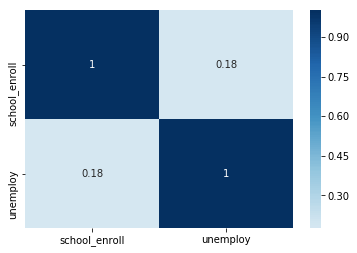

In [15]:
sn.heatmap(corrMatrix,cmap='RdBu', center=0, annot=True)
plt.savefig('male_schoo_enroll_unemploy.png')
plt.show()

- Correlation between School enrollment and unemployment for  females
Using the below indicator code / indicator names

School enrollment, secondary, female (% net) - SE.SEC.NENR.FE
Unemployment, female (% of female labor force) - SL.UEM.TOTL.FE.ZS


In [16]:
%%bigquery df_school_enroll
select  value as school_enroll, country_name, year 
from dataproc-300110.worldbankhealth.health_nutrition_population 
where indicator_code in ('SE.SEC.NENR.FE') and year > 2000

In [17]:
%%bigquery df_unemploy
select value as unemploy, country_name, year 
from dataproc-300110.worldbankhealth.health_nutrition_population 
where indicator_code in ('SL.UEM.TOTL.FE.ZS') and year > 2000

In [18]:
merge_pd = pd.merge(df_school_enroll, df_unemploy, on=['country_name','year'])

corr_df = merge_pd

corr_df.drop(['year', 'country_name'], inplace=True, axis='columns')
corrMatrix = corr_df.corr()

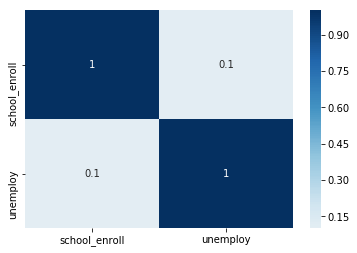

In [19]:
sn.heatmap(corrMatrix,cmap='RdBu', center=0, annot=True)
plt.savefig('male_schoo_enroll_unemploy.png')
plt.show()

- Avg age of first pregnancy around the world.
Age at first marriage, female - SP.DYN.SMAM.FE

- Avg age of first pregnancy around the world.
Use the average age of first marriage + 2 to estimate the average age of first preganancy

In [35]:
%%bigquery df_first_preg
SELECT round(value+2,1) as First_Pregnancy ,  country_code, country_name, year
FROM `dataproc-300110.worldbankhealth.wh_health_nutrition_population` 
where indicator_code like 'SP.DYN.SMAM.FE' and year = 2013 and value > 15
order by value desc 

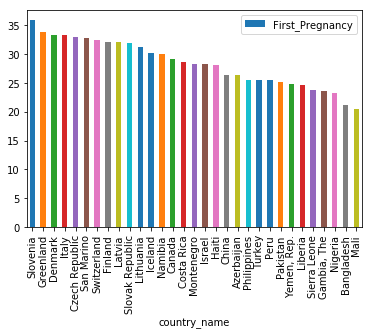

In [36]:
df_first_preg.plot(kind="bar", x="country_name", y="First_Pregnancy")

Mortality rate, infant (per 1,000 live births) - SP.DYN.IMRT.IN 


In [37]:
%%bigquery df_mortality
SELECT round(value+2,1) as infant_mortality ,  country_code, country_name, year
FROM `dataproc-300110.worldbankhealth.wh_health_nutrition_population` 
where indicator_code like 'SP.DYN.IMRT.IN' and year = 2013
order by value desc 

In [38]:
df_mortality.describe()

,infant_mortality,year
count,234.000000,234.0
mean,25.038889,2013.0
std,21.528964,0.0
min,3.000000,2013.0
25%,6.725000,2013.0
50%,17.350000,2013.0
75%,38.375000,2013.0
max,96.600000,2013.0


In [48]:
%%bigquery df_first_marriage
SELECT round(value+2,1) as first_marriage ,  country_code, country_name, year
FROM `dataproc-300110.worldbankhealth.wh_health_nutrition_population` 
where indicator_code like 'SP.DYN.SMAM.FE' and year = 2013 and value > 15
order by value desc 

In [52]:
df_marriage_mortality = pd.merge(df_first_marriage, df_mortality, on=['country_name','year'])

/usr/local/envs/py3env/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


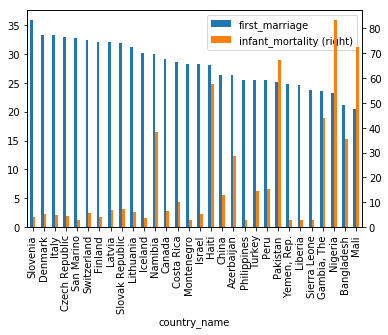

In [53]:
df_marriage_mortality.plot(kind='bar',x='country_name',y=['first_marriage', 'infant_mortality'], secondary_y= 'infant_mortality')

In [1]:
df_marriage_mortality


NameError: name 'df_marriage_mortality' is not defined

In [2]:
df_marriage_mortality

NameError: name 'df_marriage_mortality' is not defined